In [37]:
import numpy as np
import json
import os
from os import path
import matplotlib.pyplot as plt

In [81]:
from collections import Counter

In [132]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [133]:
from nltk.tokenize import sent_tokenize

In [9]:
#newspapers considered
NEWSPAPERS = {
    'http://libertatea.ro': 'news_libertatea',
    'https://stirileprotv.ro': 'news_protv',
    'https://www.digi24.ro': 'news_digi',
    'https://www.realitatea.net': 'news_realitatea',
    'https://www.mediafax.ro': 'news_mediafax',
    'https://adevarul.ro': 'news_adevarul',
    'https://alephnews.ro': 'news_aleph',
    'https://www.cotidianul.ro': 'news_cotidianul',
    'https://www.zf.ro': 'news_zf',
    'https://evz.ro': 'news_evz'
}
BASE_PATH = 'datasets/'

In [27]:
def get_news_word_counts(NEWSPAPERS, BASE_PATH):
    stats_dict = {}
    for news_url in NEWSPAPERS:
        print('Working on: {}'.format(news_url))
        path = BASE_PATH + NEWSPAPERS[news_url] + '.json'
        if os.stat(path).st_size == 0:
            dataset_list = []
        else:
            with open(path) as fp:
                dataset_list = json.load(fp)
        title_lengths = []
        article_lengths = []
        summary_lengths = []
        print('Number of articles in total: {}'.format(len(dataset_list)))
        for news in dataset_list:
            title_lengths.append(len(news['title'].split()))
            article_lengths.append(len(news['text'].split()))
            summary_lengths.append(len(news['summary'].split()))
            
        results = {'title' : title_lengths, 
                   'article' : article_lengths,
                   'summary' : summary_lengths}
        stats_dict[news_url] = results
    
    return stats_dict

In [47]:
def print_mean_lengths(NEWSPAPERS, stats_dict):
    title_lengths = []
    article_lengths = []
    summary_lengths = []
    for news in NEWSPAPERS:
        print('Stats for {}'.format(news))
        print('Mean title length : {}'.format(np.mean(stats_dict[news]['title'])))
        print('Mean article length : {}'.format(np.mean(stats_dict[news]['article'])))
        print('Mean summary length : {}'.format(np.mean(stats_dict[news]['summary'])))
        title_lengths.extend(stats_dict[news]['title'])
        article_lengths.extend(stats_dict[news]['article'])
        summary_lengths.extend(stats_dict[news]['summary'])
    
    return title_lengths, article_lengths, summary_lengths

In [68]:
def plot_dist(stats_dict):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    ax1.hist(stats_dict['title'])
    ax1.set_title('Title Distribution')
    ax2.hist(stats_dict['article'])
    ax2.set_title('Article Distribution')
    ax3.hist(stats_dict['summary'])
    ax3.set_title('Summar Distribution')

In [155]:
def get_counter(BASE_PATH, NEWSPAPERS, news_url):
    path = BASE_PATH + NEWSPAPERS[news_url] + '.json'
    sent_article = []
    sent_summary = []
    with open(path) as fp:
        dataset_list = json.load(fp)
    c = Counter()
    data = []
    for news in dataset_list:
        data.append(news['title'])
        data.append(news['text'])
        sent_article.append(len(sent_tokenize(news['text'])))
        data.append(news['summary'])
        sent_summary.append(len(sent_tokenize(news['summary'])))
    data = set(data)
    for d in data:
        c.update(d.split())
        
    return c, sent_article, sent_summary

In [159]:
def print_general_counter(BASE_PATH, NEWSPAPERS):
    dataset = []
    test_terms = ['COVID', 'COVID-19', 'virus', 'Ucraina', 'Rusia', 'război']
    sent_article = []
    sent_summary = []
    for news_url in NEWSPAPERS:
        path = BASE_PATH + NEWSPAPERS[news_url] + '.json'
        with open(path) as fp:
            dataset_list = json.load(fp)
            for data in dataset_list:
                dataset.append(data['title'])
                dataset.append(data['text'])
                sent_article.append(len(sent_tokenize(data['text'])))
                dataset.append(data['summary'])
                sent_summary.append(len(sent_tokenize(data['summary'])))
    dataset = set(dataset)
    c = Counter()
    for d in dataset:
        c.update(d.split())
        
    print('Length of vocabulary: {}'.format(len(dict(c))))
    total_words = []
    for token in dict(c):
        total_words.append(c[token])
    print('Total number of words : {}'.format(np.sum(total_words)))
    print('Mean number of words : {}'.format(np.mean(total_words)))
    print('Total number of sentences for articles: {}'.format(np.sum(sent_article)))
    print('Mean number of sentences for articles: {}'.format(np.mean(sent_article)))
    print('Total number of sentences for summaries: {}'.format(np.sum(sent_summary)))
    print('mean number of sentences for summaries: {}'.format(np.mean(sent_summary)))
    for term in test_terms:
        print('Number of appearances for {} : {}'.format(term, dict(c)[term]))

In [160]:
def print_counter_stats(news_counter):
    test_terms = ['COVID', 'COVID-19', 'virus', 'Ucraina', 'Rusia', 'război']
    print('Length of vocabulary: {}'.format(len(dict(news_counter))))
    total_words = []
    for token in dict(news_counter):
        total_words.append(news_counter[token])
    print('Total number of words: {}'.format(np.sum(total_words)))
    print('Mean number of words: {}'.format(np.mean(total_words)))
    for term in test_terms:
        print('Number of appearances for {} : {}'.format(term, dict(news_counter)[term]))

## Number of articles

In [28]:
%%time
stats_dict = get_news_word_counts(NEWSPAPERS, BASE_PATH)

Working on: http://libertatea.ro
Number of articles in total: 3776
Working on: https://stirileprotv.ro
Number of articles in total: 5989
Working on: https://www.digi24.ro
Number of articles in total: 3554
Working on: https://www.realitatea.net
Number of articles in total: 1170
Working on: https://www.mediafax.ro
Number of articles in total: 5908
Working on: https://adevarul.ro
Number of articles in total: 10645
Working on: https://alephnews.ro
Number of articles in total: 761
Working on: https://www.cotidianul.ro
Number of articles in total: 1487
Working on: https://www.zf.ro
Number of articles in total: 4516
Working on: https://evz.ro
Number of articles in total: 905
CPU times: total: 3.09 s
Wall time: 3.08 s


In [30]:
print('Total number of articles : 38711')

Total number of articles : 38711


## Mean lengths

In [50]:
title_lengths, article_lengths, summary_lengths = print_mean_lengths(NEWSPAPERS, stats_dict)

Stats for http://libertatea.ro
Mean title length : 12.936440677966102
Mean article length : 465.17452330508473
Mean summary length : 83.4947033898305
Stats for https://stirileprotv.ro
Mean title length : 16.607113040574387
Mean article length : 468.3573217565537
Mean summary length : 114.61112038737686
Stats for https://www.digi24.ro
Mean title length : 14.463421496904896
Mean article length : 378.35959482273495
Mean summary length : 103.7068092290377
Stats for https://www.realitatea.net
Mean title length : 16.035897435897436
Mean article length : 300.7717948717949
Mean summary length : 107.49743589743589
Stats for https://www.mediafax.ro
Mean title length : 14.507786052809749
Mean article length : 629.976134055518
Mean summary length : 107.44143534190927
Stats for https://adevarul.ro
Mean title length : 13.957444809769845
Mean article length : 829.6267731329262
Mean summary length : 105.81878816345703
Stats for https://alephnews.ro
Mean title length : 15.486202365308804
Mean article l

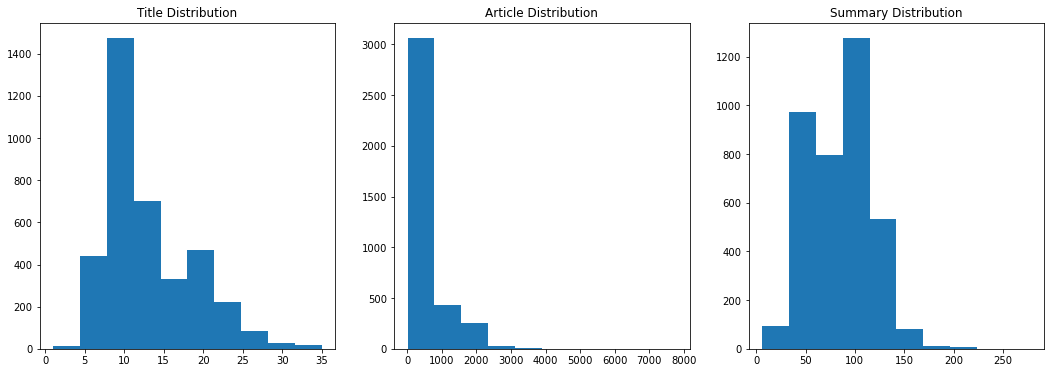

In [69]:
plot_dist(stats_dict['http://libertatea.ro'])

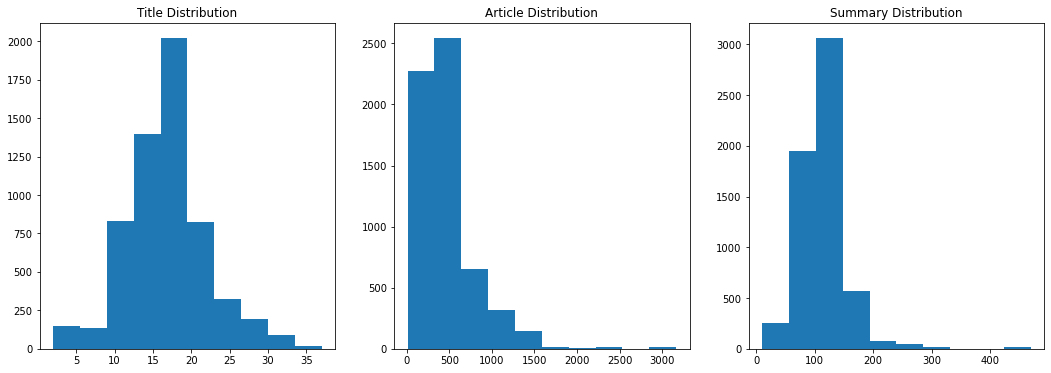

In [70]:
plot_dist(stats_dict['https://stirileprotv.ro'])

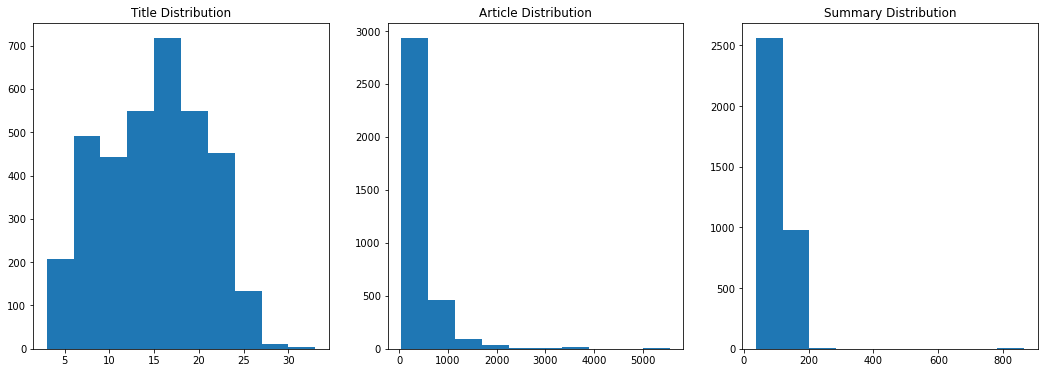

In [71]:
plot_dist(stats_dict['https://www.digi24.ro'])

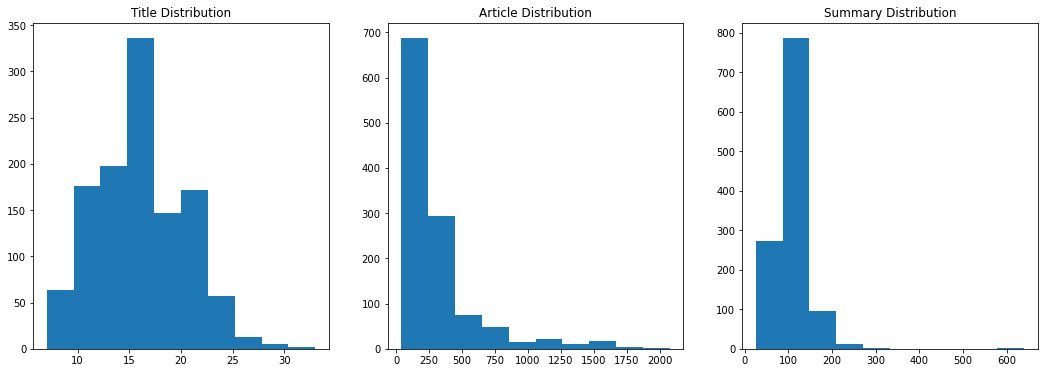

In [72]:
plot_dist(stats_dict['https://www.realitatea.net'])

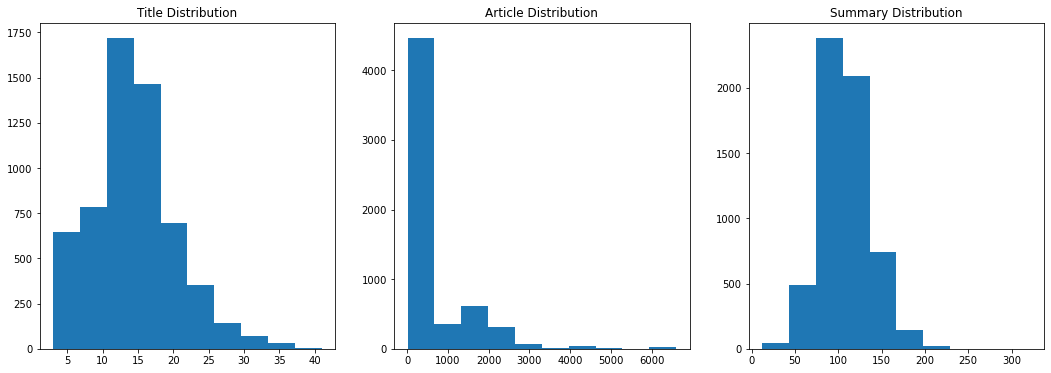

In [73]:
plot_dist(stats_dict['https://www.mediafax.ro'])

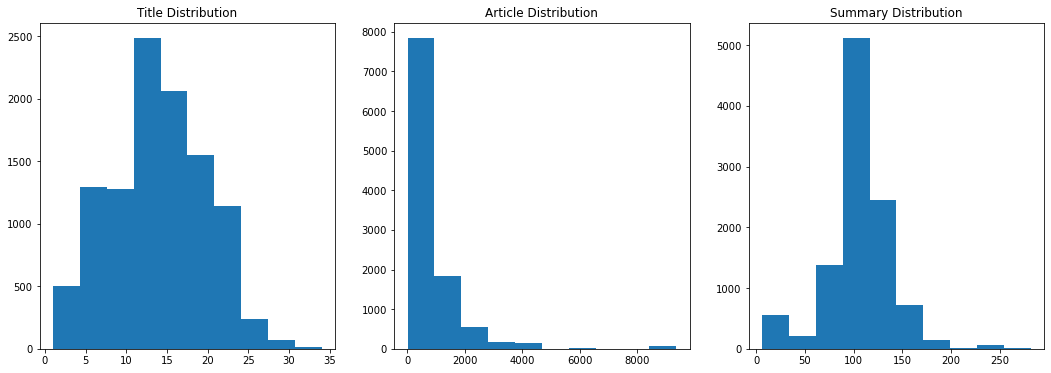

In [74]:
plot_dist(stats_dict['https://adevarul.ro'])

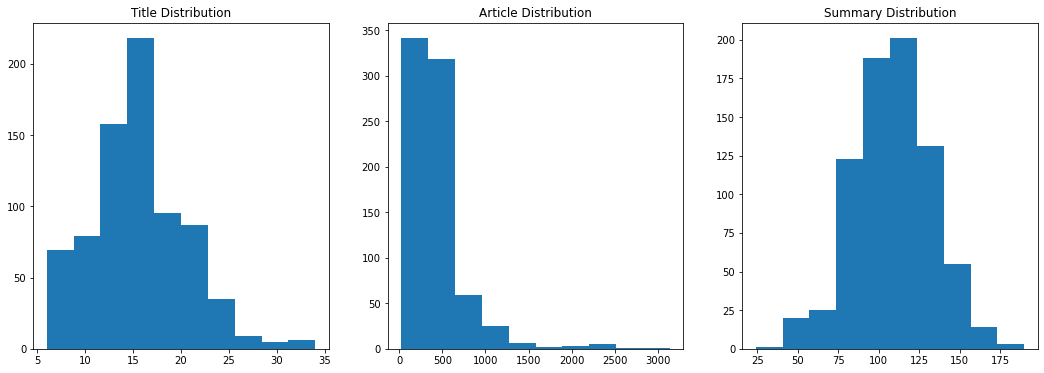

In [75]:
plot_dist(stats_dict['https://alephnews.ro'])

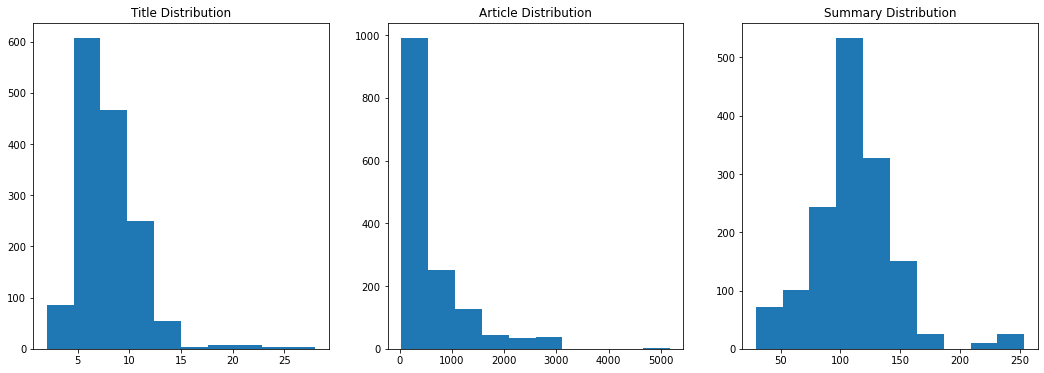

In [76]:
plot_dist(stats_dict['https://www.cotidianul.ro'])

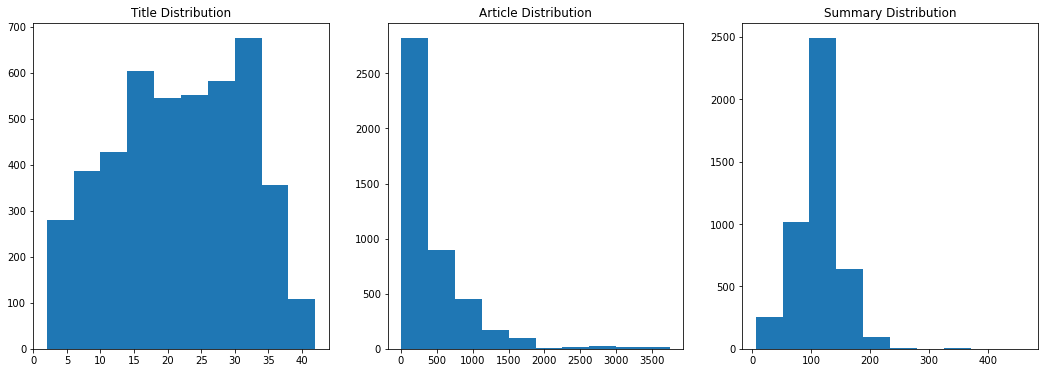

In [77]:
plot_dist(stats_dict['https://www.zf.ro'])

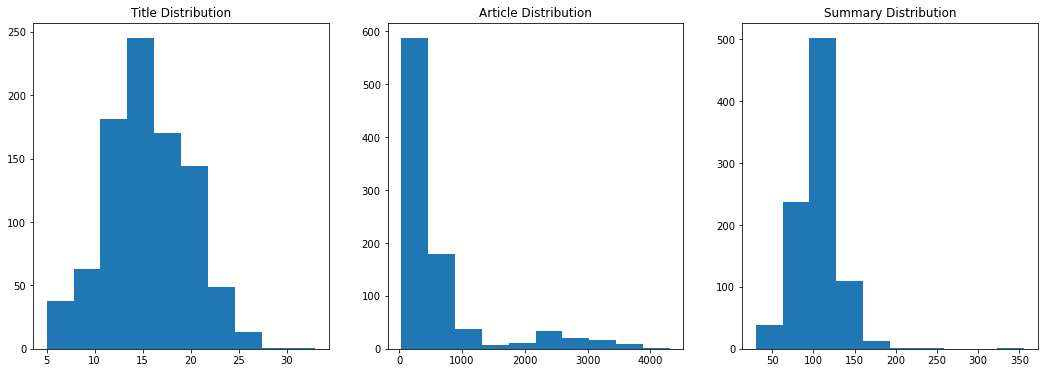

In [78]:
plot_dist(stats_dict['https://evz.ro'])

In [52]:
print("Mean title length : {}".format(np.mean(title_lengths)))
print("Mean article length : {}".format(np.mean(article_lengths)))
print("Mean summary length : {}".format(np.mean(summary_lengths)))
print("Median title length : {}".format(np.median(title_lengths)))
print("Median article length : {}".format(np.median(article_lengths)))
print("Median summary length : {}".format(np.median(summary_lengths)))

Mean title length : 15.146934979721527
Mean article length : 587.0643228023042
Mean summary length : 106.27436645914598
Median title length : 15.0
Median article length : 341.0
Median summary length : 106.0


(array([1868., 6505., 8194., 9276., 7009., 3116., 1306.,  909.,  415.,
         113.]),
 array([ 1. ,  5.1,  9.2, 13.3, 17.4, 21.5, 25.6, 29.7, 33.8, 37.9, 42. ]),
 <BarContainer object of 10 artists>)

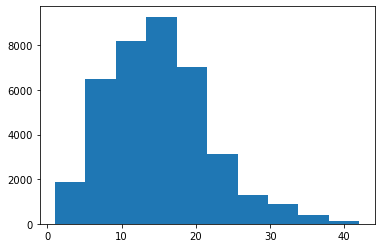

In [79]:
plt.hist(title_lengths)

(array([3.2204e+04, 4.5400e+03, 1.3100e+03, 3.2200e+02, 2.0400e+02,
        2.3000e+01, 1.2000e+01, 2.7000e+01, 1.0000e+00, 6.8000e+01]),
 array([6.0000e+00, 9.4180e+02, 1.8776e+03, 2.8134e+03, 3.7492e+03,
        4.6850e+03, 5.6208e+03, 6.5566e+03, 7.4924e+03, 8.4282e+03,
        9.3640e+03]),
 <BarContainer object of 10 artists>)

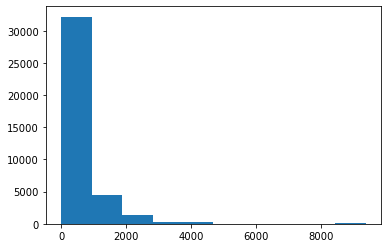

In [80]:
plt.hist(article_lengths)

(array([1.1017e+04, 2.6950e+04, 6.4900e+02, 7.2000e+01, 1.0000e+00,
        1.7000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([  6. ,  91.9, 177.8, 263.7, 349.6, 435.5, 521.4, 607.3, 693.2,
        779.1, 865. ]),
 <BarContainer object of 10 artists>)

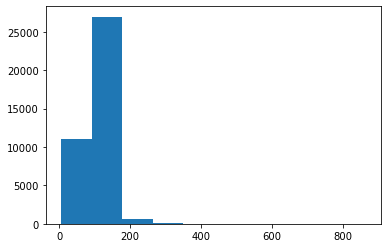

In [56]:
plt.hist(summary_lengths)

## Vocabulary

In [161]:
print_general_counter(BASE_PATH, NEWSPAPERS)

Length of vocabulary: 286227
Total number of words : 6850895
Mean number of words : 23.935180818022058
Total number of sentences for articles: 1004869
Mean number of sentences for articles: 25.95822892717832
Total number of sentences for summaries: 183098
mean number of sentences for summaries: 4.729870062772855
Number of appearances for COVID : 198
Number of appearances for COVID-19 : 399
Number of appearances for virus : 84
Number of appearances for Ucraina : 3527
Number of appearances for Rusia : 4231
Number of appearances for război : 1787


In [163]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'http://libertatea.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 85493
Total number of words: 1761232
Mean number of words: 20.60089130104219
Number of appearances for COVID : 44
Number of appearances for COVID-19 : 35
Number of appearances for virus : 7
Number of appearances for Ucraina : 507
Number of appearances for Rusia : 846
Number of appearances for război : 300
Total number of sentences for articles : 90603
Mean number of sentences for articles : 23.994438559322035
Total number of sentences for summaries: 15644
Mean number of sentences for summaries: 4.143008474576271


In [164]:
c , mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://stirileprotv.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 71852
Total number of words: 841240
Mean number of words: 11.7079552413294
Number of appearances for COVID : 12
Number of appearances for COVID-19 : 52
Number of appearances for virus : 17
Number of appearances for Ucraina : 236
Number of appearances for Rusia : 204
Number of appearances for război : 67
Total number of sentences for articles : 123731
Mean number of sentences for articles : 20.65970946735682
Total number of sentences for summaries: 29113
Mean number of sentences for summaries: 4.861078644180998


In [165]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://www.digi24.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 64782
Total number of words: 618506
Mean number of words: 9.547497761723935
Number of appearances for COVID : 16
Number of appearances for COVID-19 : 36
Number of appearances for virus : 11
Number of appearances for Ucraina : 525
Number of appearances for Rusia : 703
Number of appearances for război : 765
Total number of sentences for articles : 60895
Mean number of sentences for articles : 17.13421496904896
Total number of sentences for summaries: 17455
Mean number of sentences for summaries: 4.911367473269555


In [166]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://www.realitatea.net')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 47371
Total number of words: 362680
Mean number of words: 7.656160942348694
Number of appearances for COVID : 18
Number of appearances for COVID-19 : 37
Number of appearances for virus : 5
Number of appearances for Ucraina : 233
Number of appearances for Rusia : 225
Number of appearances for război : 56
Total number of sentences for articles : 16563
Mean number of sentences for articles : 14.156410256410256
Total number of sentences for summaries: 5518
Mean number of sentences for summaries: 4.716239316239316


In [167]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://www.mediafax.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 74217
Total number of words: 699906
Mean number of words: 9.43053478313594
Number of appearances for COVID : 31
Number of appearances for COVID-19 : 45
Number of appearances for virus : 9
Number of appearances for Ucraina : 534
Number of appearances for Rusia : 509
Number of appearances for război : 134
Total number of sentences for articles : 167284
Mean number of sentences for articles : 28.314827352742046
Total number of sentences for summaries: 28683
Mean number of sentences for summaries: 4.854942450914015


In [168]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://adevarul.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 101797
Total number of words: 1046278
Mean number of words: 10.278082851164573
Number of appearances for COVID : 9
Number of appearances for COVID-19 : 70
Number of appearances for virus : 5
Number of appearances for Ucraina : 674
Number of appearances for Rusia : 782
Number of appearances for război : 198
Total number of sentences for articles : 376662
Mean number of sentences for articles : 35.38393612024424
Total number of sentences for summaries: 50240
Mean number of sentences for summaries: 4.719586660403945


In [169]:
c, mean_article, mean_summary= get_counter(BASE_PATH, NEWSPAPERS, 'https://alephnews.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 41419
Total number of words: 320398
Mean number of words: 7.735532002221203
Number of appearances for COVID : 43
Number of appearances for COVID-19 : 69
Number of appearances for virus : 22
Number of appearances for Ucraina : 343
Number of appearances for Rusia : 373
Number of appearances for război : 101
Total number of sentences for articles : 14047
Mean number of sentences for articles : 18.458607095926414
Total number of sentences for summaries: 3774
Mean number of sentences for summaries: 4.959264126149803


In [170]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://www.cotidianul.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 39774
Total number of words: 236717
Mean number of words: 5.9515512646452455
Number of appearances for COVID : 13
Number of appearances for COVID-19 : 18
Number of appearances for virus : 1
Number of appearances for Ucraina : 128
Number of appearances for Rusia : 156
Number of appearances for război : 64
Total number of sentences for articles : 35677
Mean number of sentences for articles : 23.992602555480833
Total number of sentences for summaries: 7118
Mean number of sentences for summaries: 4.786819098856759


In [171]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://www.zf.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 58590
Total number of words: 592631
Mean number of words: 10.114883085850828
Number of appearances for COVID : 8
Number of appearances for COVID-19 : 25
Number of appearances for virus : 3
Number of appearances for Ucraina : 277
Number of appearances for Rusia : 289
Number of appearances for război : 66
Total number of sentences for articles : 85997
Mean number of sentences for articles : 19.04273693534101
Total number of sentences for summaries: 21103
Mean number of sentences for summaries: 4.672940655447299


In [172]:
c, mean_article, mean_summary = get_counter(BASE_PATH, NEWSPAPERS, 'https://evz.ro')
print_counter_stats(c)
print('Total number of sentences for articles : {}'.format(np.sum(mean_article)))
print('Mean number of sentences for articles : {}'.format(np.mean(mean_article)))
print('Total number of sentences for summaries: {}'.format(np.sum(mean_summary)))
print('Mean number of sentences for summaries: {}'.format(np.mean(mean_summary)))

Length of vocabulary: 67464
Total number of words: 494125
Mean number of words: 7.324276651251037
Number of appearances for COVID : 4
Number of appearances for COVID-19 : 15
Number of appearances for virus : 4
Number of appearances for Ucraina : 167
Number of appearances for Rusia : 233
Number of appearances for război : 70
Total number of sentences for articles : 33410
Mean number of sentences for articles : 36.9171270718232
Total number of sentences for summaries: 4450
Mean number of sentences for summaries: 4.917127071823204
